## Importing needed libraries


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Creating dataframe using pandas dataframe

In [3]:
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,13972.000000,1.397200e+04,13972.000000,13972.000000
mean,2023.085600,1.660011e+05,150028.812124,33.334526
std,0.687612,3.661545e+05,68634.306349,46.682931
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103000.000000,0.000000
50%,2023.000000,1.422000e+05,141600.000000,0.000000
75%,2024.000000,1.880000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


## Remove all rows with missing values

In [6]:
df.duplicated().sum() # number of duplicated rows


5378

In [7]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8594 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8594 non-null   int64 
 1   experience_level    8594 non-null   object
 2   employment_type     8594 non-null   object
 3   job_title           8594 non-null   object
 4   salary              8594 non-null   int64 
 5   salary_currency     8594 non-null   object
 6   salary_in_usd       8594 non-null   int64 
 7   employee_residence  8594 non-null   object
 8   remote_ratio        8594 non-null   int64 
 9   company_location    8594 non-null   object
 10  company_size        8594 non-null   object
dtypes: int64(4), object(7)
memory usage: 805.7+ KB


### Creating 3 new dataframes to display 

In [8]:
df_S = df[df['company_size'] == 'S']
df_M = df[df['company_size'] == 'M']
df_L = df[df['company_size'] == 'L']


### Bar Chart to display the number of companies per size

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


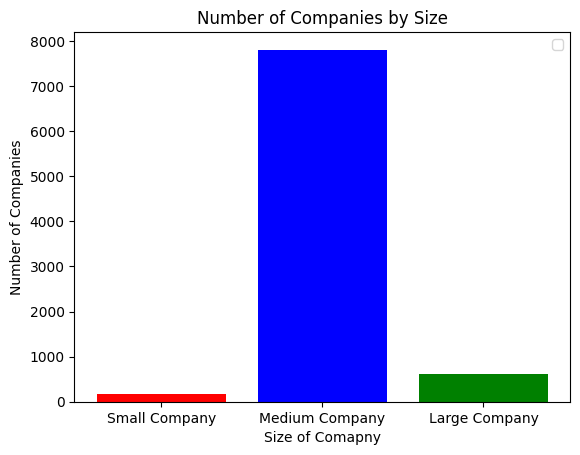

In [21]:
num_S = len(df_S)
num_M = len(df_M)
num_L = len(df_L)

plt.bar(["Small Company", "Medium Company", "Large Company"], [num_S, num_M, num_L], color=['red', 'blue', 'green'])

plt.title("Number of Companies by Size")
plt.xlabel("Size of Comapny")
plt.ylabel("Number of Companies")
           
plt.legend()
plt.show()

In [17]:
print(f'There are {num_S} small companies, {num_M} medium companies, and {num_L} large companies.')

There are 177 small companies, 7805 medium companies, and 612 large companies.


### Bar Chart to display the nuber of Jobs by job_title

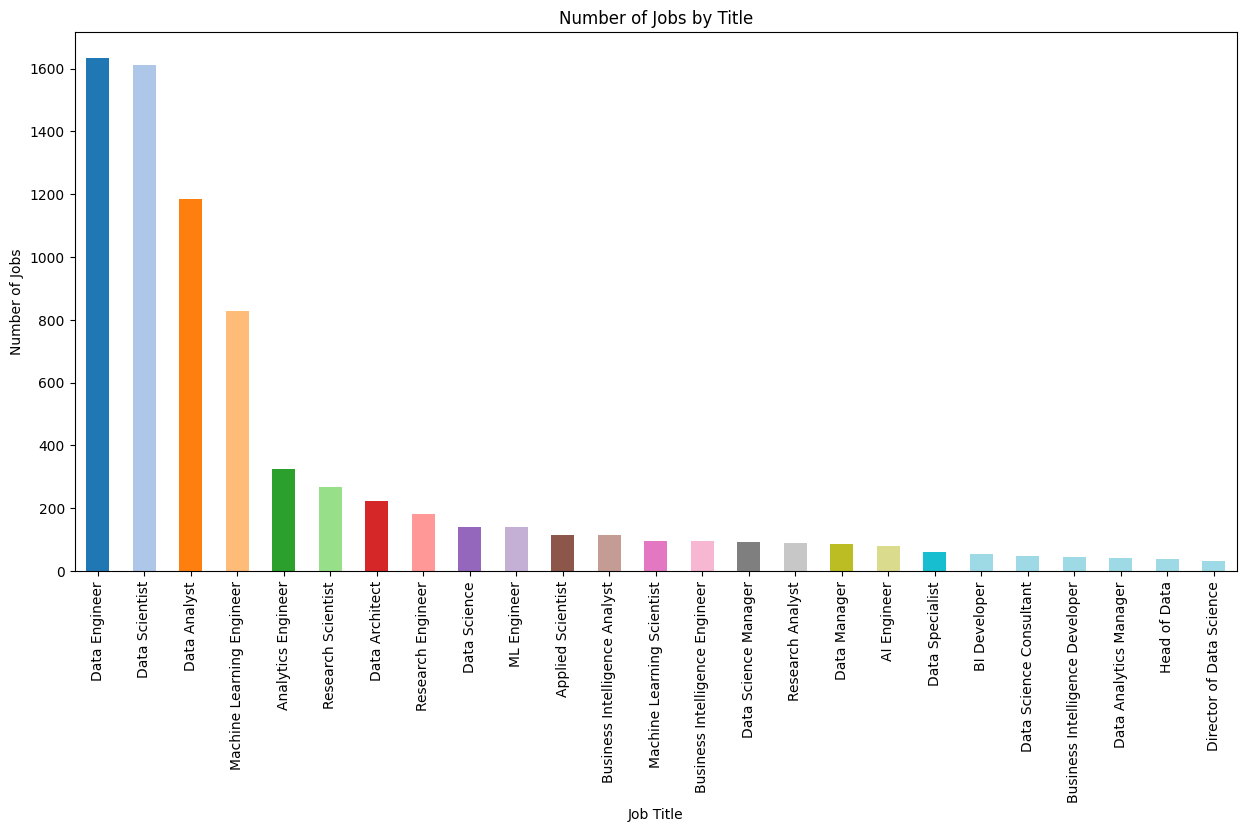

In [32]:
job_counts = df['job_title'].value_counts()

top_25_jobs = job_counts.nlargest(25)
plot_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', 
               '#2ca02c', '#98df8a', '#d62728', '#ff9896', 
               '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', 
               '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', 
               '#bcbd22', '#dbdb8d', '#17becf', '#9edae5', 
               '#9edae5', '#9edae5', '#9edae5', '#9edae5', 
               '#9edae5']

plt.figure(figsize=(15, 7))

top_25_jobs.plot(kind='bar', color =plot_colors)
plt.title("Number of Jobs by Title")
plt.xlabel("Job Title")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=90)

plt.show()

### Plotting the salaries of the top 4 jobs by 'job_title'

Text(0, 0.5, 'Salary in USD')

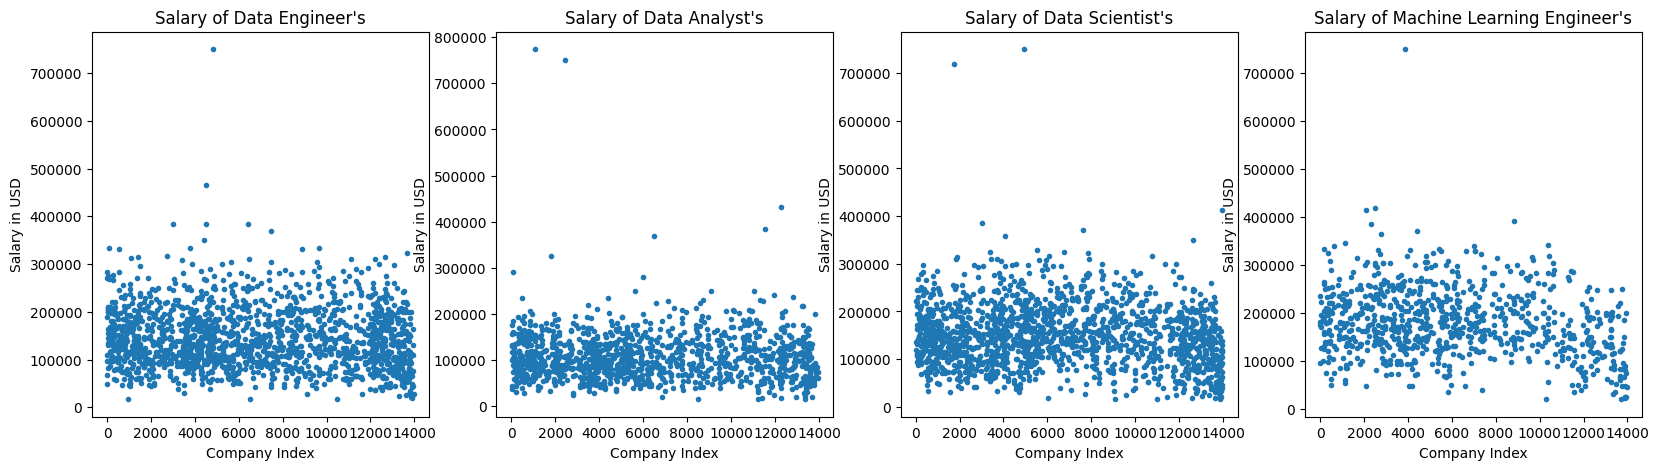

In [42]:
df_jobDE = df[df['job_title'] == 'Data Engineer']
df_jobDA = df[df['job_title'] == 'Data Analyst']
df_jobDS = df[df['job_title'] == 'Data Scientist']
df_jobMLE = df[df['job_title'] == 'Machine Learning Engineer']

plt.figure(figsize=(20,5))

plt.subplot(1, 4, 1)
plt.scatter(df_jobDE.index, df_jobDE['salary_in_usd'], marker='.')
plt.title("Salary of Data Engineer\'s")
plt.xlabel("Company Index")
plt.ylabel("Salary in USD")

plt.subplot(1, 4, 2)
plt.scatter(df_jobDA.index, df_jobDA['salary_in_usd'], marker='.')
plt.title("Salary of Data Analyst\'s")
plt.xlabel("Company Index")
plt.ylabel("Salary in USD")

plt.subplot(1, 4, 3)
plt.scatter(df_jobDS.index, df_jobDS['salary_in_usd'], marker='.')
plt.title("Salary of Data Scientist\'s")
plt.xlabel("Company Index")
plt.ylabel("Salary in USD")

plt.subplot(1, 4, 4)
plt.scatter(df_jobMLE.index, df_jobMLE['salary_in_usd'], marker='.')
plt.title("Salary of Machine Learning Engineer\'s")
plt.xlabel("Company Index")
plt.ylabel("Salary in USD")


### Scatter plot for each size of company where the company index is the x position and the salary is the y position

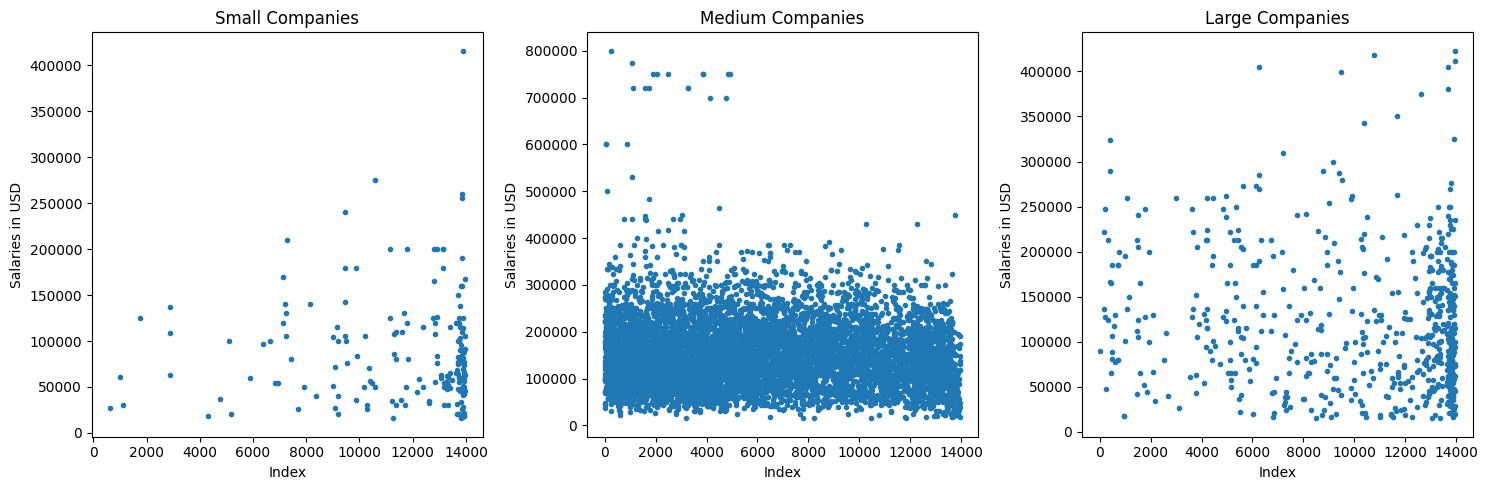

In [31]:

plt.figure(figsize=(15,5))  # creating scatter plot

plt.subplot(1, 3, 1)
plt.scatter(df_S.index, df_S['salary_in_usd'], marker='.')
plt.title("Small Companies")
plt.xlabel("Index")
plt.ylabel("Salaries in USD")

plt.subplot(1, 3, 2)
plt.scatter(df_M.index, df_M['salary_in_usd'], marker='.')
plt.title("Medium Companies")
plt.xlabel("Index")
plt.ylabel("Salaries in USD")

plt.subplot(1, 3, 3)
plt.scatter(df_L.index, df_L['salary_in_usd'], marker= '.')
plt.title("Large Companies")
plt.xlabel("Index")
plt.ylabel("Salaries in USD")

plt.tight_layout()
plt.show()



In [11]:
df_S.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
613,2024,EN,FT,ML Engineer,27000,USD,27000,TR,0,TR,S
990,2023,MI,FT,Prompt Engineer,56000,EUR,60462,DE,0,DE,S
1103,2024,MI,FT,AI Programmer,30000,USD,30000,BA,0,BA,S
1750,2024,MI,CT,Data Analyst Lead,200000,NZD,125000,NZ,50,NZ,S
2874,2024,SE,FT,ML Engineer,110000,GBP,137500,GB,0,GB,S


### Obtaining the average salary for each sized company

In [12]:
small_average_salary = 0

for salary in df_S['salary_in_usd']:
    small_average_salary = (small_average_salary + salary)
small_average_salary = (small_average_salary // len(df_S['salary_in_usd']))


In [13]:
medium_average_salary = 0

for salary in df_M['salary_in_usd']:
    medium_average_salary = (medium_average_salary + salary)
medium_average_salary = (medium_average_salary // len(df_M['salary_in_usd']))

In [14]:
large_average_salary = 0

for salary in df_L['salary_in_usd']:
    large_average_salary = (large_average_salary + salary)
large_average_salary = (large_average_salary // len(df_L['salary_in_usd']))

### Bar Graph showing the average salary per size of company

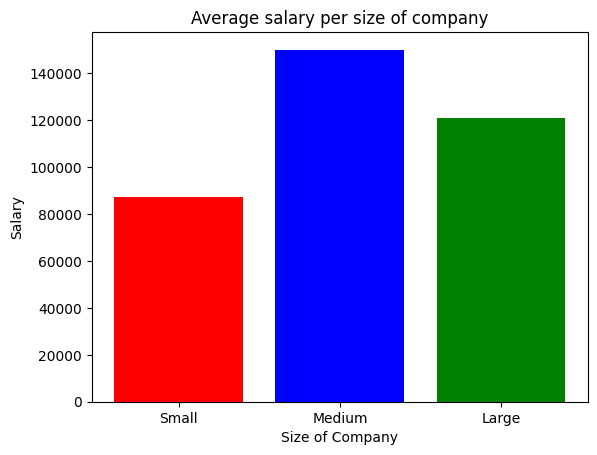

In [15]:
values = [small_average_salary, medium_average_salary, large_average_salary]
labels = ['Small', 'Medium', 'Large']

plt.bar(labels, values, color=['red', 'blue', 'green'])
plt.title("Average salary per size of company")
plt.xlabel("Size of Company")
plt.ylabel("Salary")
plt.show()